(lecture09:the-binomial-distribution)=
# The Binomial Distribution

Suppose that we are dealing with an experiment with two outcomes 0 (faillure) and 1 (success) and that the probability of success is $\theta$.
We are interested in the random variable $X$ tha counts the number of successful experiments in $n$ trials.
This variable is called a Binomial random variable.
We write:

$$
X\sim \text{Binomial}(n, \theta).
$$

It can be shown (but beyond the scope of this class), that the probability of $k$ successful experiments is given by the PMF:

$$
p(X = k) = {n\choose{k}}\theta^k(1-\theta)^{n-k},
$$

where ${n\choose{k}}$ is the number of $k$ combinations out of $n$ elements, i.e.:

$$
{n\choose{k}} = \frac{n!}{k!(n-k)!}.
$$

Here is how to define the binomial in scipy.stats:

In [9]:
MAKE_BOOK_FIGURES=True

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

import numpy as np
import scipy.stats as st

In [10]:
n = 5       # Performing the experiment n times
theta = 0.6 # Probability of sucess each time
X = st.binom(n, theta) # Number of successes

Here are some samples:

In [11]:
X.rvs(10)

array([5, 1, 3, 3, 1, 3, 3, 4, 3, 3])

Let's draw the PMF:

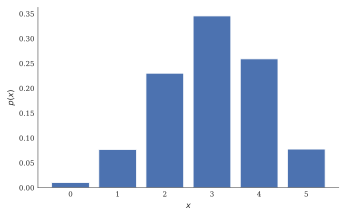

In [12]:
fig, ax = make_full_width_fig()
xs = range(n + 1)
ax.bar(xs, X.pmf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
save_for_book(fig, 'ch9.fig3')

## Questions

+ Start increasing the number of trials $n$. Gradually take it up to $n=100$. How does the resulting pmf look like?
This starts to look like a bell curve. And indeed it is!
We will learn more about this in {ref}`lecture11`.